In [2]:
#Useful packages
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
data = pd.read_csv(url)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Cargar el dataset desde la URL
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
data = pd.read_csv(url)

# Cojer solo las columnas importantes
diabetes_simplified = data[["Glucose", "BMI", "Age", "BloodPressure", "Outcome"]]

# Guardar en un CSV
diabetes_simplified.to_csv("raw_diabetes.csv", index=False)  # index=False evita una columna extra

Ahora tenemos guardado el archivo raw_diabetes.csv que contiene todas las observaciones. Ahora generaremos un archivo legible por ampl, lo hacemos con la siguiente funcion que genera un archivo .dat con el primer 90% de las observaciones. El otro 10% es para test. Después de hacerlo devuelve X_train, y_train, X_test y y_test. 

In [6]:
def csv_to_ampl_dual():
    """
    Procesa 'raw_diabetes.csv' y genera dos archivos .dat para AMPL:
    - 'data_primal_diabetes.dat' para el problema primal con matriz A y etiquetas y
    - 'data_dual_diabetes.dat' para el problema dual con matriz de Gram K y etiquetas y
    También devuelve las matrices X_train, y_train, X_test, y_test como arrays de NumPy.
    """
    # Leer los datos
    data = pd.read_csv("raw_diabetes.csv")
    total_m = len(data)
    
    # Dividir en 90% entrenamiento y 10% test
    split_idx = int(0.9 * total_m)
    train_data = data.iloc[:split_idx].reset_index(drop=True)
    test_data = data.iloc[split_idx:].reset_index(drop=True)
    
    columnas_features = ["Glucose", "BMI", "Age", "BloodPressure"]
    n = len(columnas_features)
    m = len(train_data)

    X_train = train_data[columnas_features].to_numpy()
    y_train = train_data["Outcome"].replace({0: -1, 1: 1}).to_numpy()

    X_test = test_data[columnas_features].to_numpy()
    y_test = test_data["Outcome"].replace({0: -1, 1: 1}).to_numpy()

    # === Archivo PRIMAL ===
    with open("data_primal_diabetes.dat", "w") as f:
        f.write(f"param m := {m};\n")
        f.write(f"param n := {n};\n\n")
        
        f.write("param A : " + " ".join(str(j+1) for j in range(n)) + " :=\n")
        for i in range(m):
            f.write(f"{i+1} " + " ".join(f"{X_train[i, j]:.6f}" for j in range(n)) + "\n")
        f.write(";\n\n")
        
        f.write("param y :=\n")
        for i in range(m):
            f.write(f"{i+1} {int(y_train[i])}\n")
        f.write(";\n")

    # === Archivo DUAL ===
    K = X_train @ X_train.T  # matriz de Gram

    with open("data_dual_diabetes.dat", "w") as f:
        f.write(f"param m := {m};\n\n")

        f.write("param y :=\n")
        for i in range(m):
            f.write(f"{i+1} {int(y_train[i])}\n")
        f.write(";\n\n")

        f.write("param K : " + " ".join(str(j+1) for j in range(m)) + " :=\n")
        for i in range(m):
            f.write(f"{i+1} " + " ".join(f"{K[i, j]:.6f}" for j in range(m)) + "\n")
        f.write(";\n")

    print("Archivos AMPL generados correctamente:")
    print(f"(Entrenamiento con {m} observaciones, test con {total_m - m})")

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = csv_to_ampl_dual()

Archivos AMPL generados correctamente:
(Entrenamiento con 691 observaciones, test con 77)


Para el problema primal, después de ejecutarlo con ampl, obtenemos que: 

**w = [0.026773, 0.065770, 0.019861, -0.011386];**

**gamma = -5.909629**

In [50]:

w = [0.026773, 0.065770, 0.019861, -0.011386]
gamma = -5.909629

s = [0.564187, 0.000000, 0.570980, 0.000000, 0.207134, 0.000000, 2.835427, 1.066872, 0.000000, 3.583671, 0.056596, 0.079888, 0.815286, 0.000000, 0.575428, 1.623718, 1.078955, 2.325070, 1.009615, 1.716631, 0.582731, 0.105705, 0.000000, 2.151300, 0.731379, 1.500356, 0.394061, 0.000000, 0.630874, 0.172693, 0.713977, 0.910480, 0.000000, 0.000000, 0.177482, 0.000000, 0.798324, 1.966754, 2.225703, 1.205414, 1.933281, 1.073484, 0.000000, 0.000000, 1.215021, 0.000000, 0.890873, 0.000000, 1.716251, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.471139, 0.000000, 0.000000, 0.459363, 1.603056, 0.339170, 0.000000, 1.230282, 0.000000, 0.352121, 1.617639, 0.000000, 2.101175, 0.841906, 0.000000, 0.468330, 2.263927, 0.480444, 0.872475, 0.330143, 0.000000, 0.000000, 0.000000, 0.000000, 0.044762, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.527074, 0.000000, 0.409371, 0.041893, 0.771514, 0.000000, 0.000000, 0.252405, 0.276436, 1.384947, 0.000000, 1.149848, 0.000000, 0.000000, 0.000000, 0.783679, 0.145068, 0.603393, 0.000000, 0.000000, 0.000000, 0.130765, 0.000000, 0.960286, 0.000000, 2.397607, 0.484524, 0.316049, 0.000000, 0.000000, 0.460316, 0.784842, 1.441522, 0.000000, 0.000000, 0.000000, 0.000000, 0.059404, 0.000000, 0.846473, 2.102741, 0.761485, 0.923405, 0.236076, 1.715733, 1.988609, 0.466234, 1.435454, 0.222117, 0.000000, 0.000000, 0.592482, 0.000000, 0.000000, 0.261121, 0.064699, 0.109216, 0.347217, 0.000000, 1.804582, 1.121460, 0.000000, 0.000000, 0.000000, 1.645208, 0.000000, 0.825320, 0.000000, 0.622261, 1.379968, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.776623, 0.318970, 0.674825, 0.000000, 1.690535, 2.187050, 0.875687, 0.150874, 0.000000, 0.000000, 2.371796, 1.214917, 0.000000, 0.000000, 0.000000, 0.071478, 0.000000, 0.000000, 1.923832, 1.056409, 0.000000, 0.299763, 0.000000, 0.000000, 0.632404, 0.000000, 0.000000, 1.838548, 2.406107, 1.524287, 0.000000, 0.557779, 0.689884, 0.000000, 0.000000, 0.468702, 0.000000, 2.787979, 1.914958, 1.022203, 0.000000, 1.044797, 0.000000, 0.000000, 0.600007, 0.000000, 0.000000, 0.244355, 0.000000, 0.000000, 0.000000, 1.349729, 2.241946, 0.623106, 1.880451, 0.160107, 1.846276, 0.271324, 2.933669, 1.362193, 0.161332, 0.315186, 0.668567, 1.314583, 0.000000, 0.000000, 0.000000, 0.241245, 2.596980, 0.761331, 0.756317, 0.280831, 0.000000, 0.460276, 0.000000, 0.000000, 0.000000, 0.000000, 0.814110, 0.000000, 0.000000, 0.000000, 1.682446, 1.855230, 1.222193, 0.005030, 0.448676, 2.379662, 0.616660, 0.000000, 0.222357, 0.000000, 0.000000, 0.000000, 2.463375, 1.986095, 0.000000, 0.000000, 1.868273, 0.422195, 2.137231, 0.625344, 0.000000, 1.363350, 1.522780, 0.000000, 0.331030, 0.896006, 0.000000, 0.636046, 1.430992, 0.000000, 0.000000, 0.000000, 0.413319, 0.130801, 2.436042, 0.000000, 0.069594, 0.000000, 0.749080, 0.814393, 0.514930, 0.645599, 2.120545, 0.611775, 1.504244, 1.127831, 0.000000, 0.191704, 0.000000, 1.847204, 0.907337, 0.888927, 1.562753, 1.318025, 1.380346, 0.003069, 1.799722, 0.000000, 0.000000, 1.139924, 0.000000, 0.911295, 0.356919, 0.624761, 0.762919, 0.032123, 1.754497, 1.604436, 0.000000, 0.159507, 1.316738, 0.000000, 1.687162, 0.073775, 0.000000, 0.297652, 0.479668, 0.000000, 0.285219, 2.178830, 1.869782, 1.248314, 0.000000, 0.634228, 1.467741, 2.129004, 1.708706, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 2.309263, 1.319671, 1.770241, 0.823583, 0.000000, 0.000000, 0.000000, 0.000000, 0.315033, 0.366354, 0.967048, 0.612534, 0.198391, 0.000000, 4.389112, 0.000000, 0.449617, 0.000000, 0.000000, 0.000000, 0.521560, 1.386121, 0.000000, 0.000000, 0.000000, 0.000000, 1.734573, 0.487359, 0.026145, 1.074557, 0.000000, 2.018424, 0.000000, 0.000000, 1.459287, 0.189553, 0.000000, 0.000000, 0.032986, 0.701522, 0.365033, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.827094, 1.495558, 0.731489, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.788170, 0.148437, 0.000000, 1.461061, 0.000000, 0.000000, 2.374629, 0.747626, 1.227925, 0.000000, 0.162428, 1.122164, 1.836246, 0.000000, 0.000000, 0.000000, 0.000000, 0.028100, 1.187996, 0.216519, 1.205464, 0.449487, 0.000000, 0.721054, 0.000000, 1.892255, 0.770084, 0.000000, 0.179799, 0.000000, 0.218572, 0.000000, 0.000000, 0.000000, 0.821007, 2.143945, 0.000000, 0.000000, 0.000000, 0.217465, 0.000000, 0.000000, 1.144791, 0.694598, 0.000000, 0.000000, 0.000000, 0.000000, 0.154269, 2.153837, 1.933991, 0.000000, 0.000000, 0.000000, 2.207188, 0.000000, 0.000000, 1.761588, 0.000000, 0.995375, 0.115542, 0.000000, 1.077236, 0.000000, 0.417881, 1.147471, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.969102, 1.893466, 1.284357, 0.581682, 0.513634, 0.666237, 0.000000, 0.769070, 2.216996, 0.000000, 0.099145, 0.737916, 0.446634, 0.272476, 0.000000, 0.000000, 0.000000, 0.810859, 1.199735, 3.044132, 0.000000, 2.420615, 0.000000, 0.000000, 0.000000, 1.565608, 0.000000, 1.752325, 0.000000, 0.000000, 0.000000, 1.072397, 0.000000, 0.000000, 4.304574, 0.000000, 0.020063, 0.000000, 0.019593, 0.185733, 0.000000, 0.330285, 2.613581, 0.000000, 0.000000, 0.000000, 0.000000, 0.708299, 0.984147, 0.943576, 0.000000, 0.000000, 0.000000, 0.199217, 0.000000, 1.083162, 0.331536, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.070337, 0.545728, 0.000000, 0.102314, 0.000000, 0.755006, 0.000000, 0.000000, 0.423841, 1.473928, 1.629601, 1.635358, 2.060356, 0.000000, 0.000000, 0.000000, 0.000000, 0.556406, 1.697695, 1.507191, 0.000000, 0.000000, 0.279664, 0.000000, 0.000000, 0.025115, 0.000000, 0.150325, 0.946412, 0.000000, 1.132906, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.186989, 1.510320, 0.000000, 0.000000, 0.000000, 0.000000, 0.376108, 0.606674, 0.000000, 1.422750, 0.367637, 0.000000, 0.705734, 0.000000, 0.415992, 0.281726, 1.534829, 0.000000, 0.722976, 0.000000, 0.000000, 0.000000, 0.922545, 0.268773, 1.150187, 0.000000, 0.448728, 0.268476, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.394285, 0.000000, 0.498644, 0.000000, 0.000000, 1.491832, 0.000000, 0.000000, 0.032778, 0.106979, 0.000000, 0.690260, 0.000000, 0.000000, 0.000000, 1.997025, 1.116074, 0.191354, 0.000000, 2.496598, 0.088034, 0.000000, 0.000000, 0.000000, 0.284251, 0.775737, 0.000000, 2.108911, 0.000000, 0.000000, 0.000000, 0.000000, 2.138358, 0.000000, 0.000000, 1.852503, 0.000000, 0.000000, 0.452797, 0.951709, 0.000000, 0.000000, 1.638250, 1.086768, 0.000000, 1.529562, 0.000000, 0.000000, 0.298859, 0.339677, 0.000000, 0.000000, 0.310138, 0.000000, 0.764926, 0.861472, 2.915920, 1.365391, 0.000000, 0.318587, 0.651389, 1.503076, 0.000000, 0.433504, 2.131806, 0.143876, 1.251248, 1.916632, 0.000000, 0.000000, 1.450339, 0.284942, 0.000000, 1.028612, 0.000000, 1.397986, 0.000000, 0.000000, 0.000000, 0.275332, 1.813343, 0.000000, 0.381537, 0.000000, 0.000000, 0.037805, 0.042454, 0.000000]


Ahora vamos a visualizar los slacks y tal, como antes pero sin asteriscos. Además, vamos a hacer una mini-estadística descriptiva para saber cuántos hay de cada: 

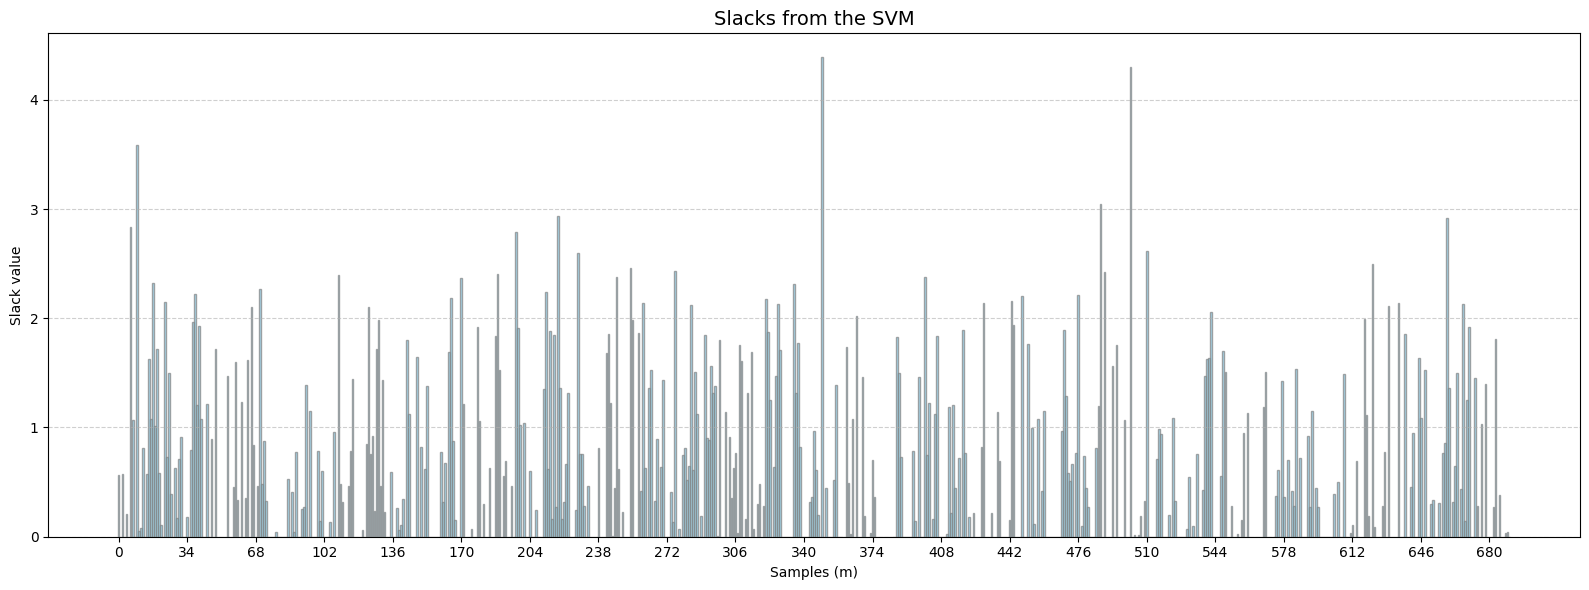

En total hay 691 slacks, de los cuales:
Hay 322 que valen cero, es decir, que están perfectamente clasificados. (46.599 %)
Hay 211 que están en (0, 1), es decir, que están bien clasificados pero dentro del margen. (30.535 %)
Hay 158 que son mayores a 1, es decir, que están mal clasificados. (22.865 %)
Por tanto, la accuracy es del 77.135 %


In [ ]:
def plot_slacks(slacks: list[float], 
                title: str = "Slacks from the SVM", xlabel: str = "Samples (m)", 
                ylabel: str = "Slack value", figsize: tuple = (16, 6)):

    m = len(slacks)
    indices = np.arange(m) 
    
    plt.figure(figsize=figsize)
    
    # Gráfico de barras
    bars = plt.bar(indices, slacks, color='skyblue', edgecolor='gray', alpha=0.7)
    
    
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    # Ajustar eje X si hay muchos datos
    if m > 50:
        plt.xticks(np.arange(0, m, max(1, m // 20)))  # Mostrar solo algunos ticks
    
    plt.tight_layout()
    plt.show()

    #Un slack es perfecto si vale cero, bien clasificado pero en los márgenes si está en (0, 1) y mal clasificado si es mayor que 1
    m = len(s)
    perfect = len([si for si in s if si==0])
    meh = len([si for si in s if (si<1) and (si>0)])
    bad = len([si for si in s if si>=1])

    print(f"En total hay {m} slacks, de los cuales:" )
    print(f"Hay { perfect } que valen cero, es decir, que están perfectamente clasificados. ({round(100*perfect/m, 3)} %)")
    print(f"Hay { meh } que están en (0, 1), es decir, que están bien clasificados pero dentro del margen. ({round(100*meh/m, 3)} %)")
    print(f"Hay { bad } que son mayores a 1, es decir, que están mal clasificados. ({round(100*bad/m, 3)} %)")
    print(f"Por tanto, la accuracy es del {round(100*( perfect+meh )/m, 3)} %")

plot_slacks(s)

Ahora vamos a ver la performance para datos de test, sorprendentemente es mejor que la otra: 

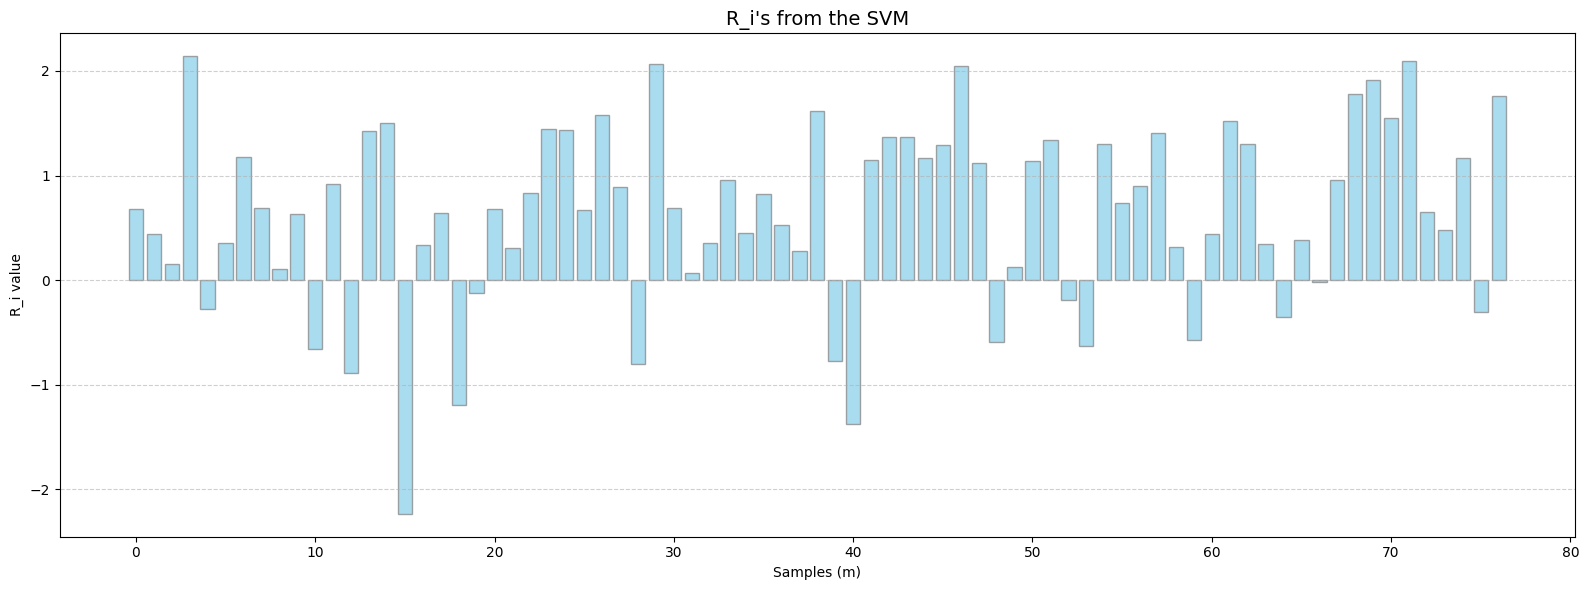

En total hay 77 ris, de los cuales:
Hay 28 mayores a uno, que están perfectamente clasificados. (36.364 %)
Hay 33 que están en (0, 1), es decir, que están bien clasificados pero dentro del margen. (42.857 %)
Hay 16 que son menores a cero, es decir, que están mal clasificados. (20.779 %)
Por tanto, la accuracy es del 79.221 %


In [54]:
def plot_test_ris( test_points:list[list[float]], y:list[float], w:list[float], gamma:float, 
                title: str = "R_i's from the SVM", xlabel: str = "Samples (m)", 
                ylabel: str = "R_i value", figsize: tuple = (16, 6)):


    # Calcular ri para TODOS los puntos (no solo 20)
    ris = [(sum(test_points[i][j] * w[j] for j in range(4)) + gamma) * y[i] 
              for i in range(len(test_points))]
    
    m = len(test_points)
    indices = np.arange(m) 
    
    plt.figure(figsize=figsize)
    bars = plt.bar(indices, ris, color='skyblue', edgecolor='gray', alpha=0.7)
    
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

    #Un ri es perfecto si es mayor que uno, es meh si está en (0, 1) y es malo si es menor que cero
    m = len(ris)
    perfect = len([ri for ri in ris if ri>=1])
    meh = len([ri for ri in ris if (ri<1 and ri>0)])
    bad = len([ri for ri in ris if ri<=0])

    print(f"En total hay {m} ris, de los cuales:" )
    print(f"Hay { perfect } mayores a uno, que están perfectamente clasificados. ({round(100*perfect/m, 3)} %)")
    print(f"Hay { meh } que están en (0, 1), es decir, que están bien clasificados pero dentro del margen. ({round(100*meh/m, 3)} %)")
    print(f"Hay { bad } que son menores a cero, es decir, que están mal clasificados. ({round(100*bad/m, 3)} %)")
    print(f"Por tanto, la accuracy es del {round(100*(perfect+meh)/m, 3)} %")

    return ris



ris = plot_test_ris( X_test, y_test, w, gamma )


Ahora vamos a hacer las cosas del problema dual. Reconstruimos w así: 

In [55]:
lambdas = [1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.515276, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.374648, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.560709, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.580142, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.129509, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 0.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, 1.000000, 0.000000, 0.000000, 1.000000, 1.000000, 0.000000, ];


def reconstruir_w(lambdas, X_train, y_train):
    """Reconstruye el vector w a partir de los lambdas, X_train y y_train."""
    
    lambdas = np.array(lambdas)
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    if not (len(lambdas) == len(X_train) == len(y_train)):
        raise ValueError("Todos los vectores deben tener la misma longitud.")
    
    w = np.sum((lambdas * y_train)[:, None] * X_train, axis=0)

    print("Vector w reconstruido:")
    print(w)
    return w

w_dual = reconstruir_w(lambdas, X_train, y_train)

Vector w reconstruido:
[ 0.026785   0.0657681  0.019873  -0.011397 ]


Además también vamos a buscar cuánto vale el intercepto gamma. Los índices de los support vectors los encontramos con este codigo y son:

In [62]:
m = len(lambdas)
indices = [ i for i in range(m) if lambdas[i] > 0 and lambdas[i] < 1 ]
print( "Los índices son: " + str([i+1 for i in indices]) )

print("A partir de aquí deducimos que la gamma puede valer: ")

mean_gamma = 0

for idx in indices: 
    gamma = y_train[idx] - sum( [ w[i]*X_train[idx][i] for i in range(4) ] )
    print(f"Para el punto {idx}, gamma = {gamma}")
    mean_gamma += gamma

mean_gamma = mean_gamma / len(indices)

print(f"El promedio es {mean_gamma}")



Los índices son: [95, 257, 325, 409, 520]
A partir de aquí deducimos que la gamma puede valer: 
Para el punto 94, gamma = -5.909713999999999
Para el punto 256, gamma = -5.909694
Para el punto 324, gamma = -5.909695999999999
Para el punto 408, gamma = -5.909739
Para el punto 519, gamma = -5.9097290000000005
El promedio es -5.9097144


De nuevo nos ha dado valores muy cercanos, casi iguales. Comparemos: 

Valores primales: 
**w = [0.026773, 0.065770, 0.019861, -0.011386];   gamma = -5.909629**

Valores duales: 
**w = [0.026785, 0.0657681, 0.019873, -0.011397 ];  gamma = -5.9097144**

In [63]:
def svm_width(w:list[float]) -> float:
    return 2 / sum( wi*wi for wi in w )

print(svm_width(w))
print(svm_width(w_dual))


359.2865954055502
359.21430875206966
